In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import seaborn as sns
# sns.set()
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True, rc=None)
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gpl
import json
import mapclassify
import matplotlib.ticker as ticker

%matplotlib inline

## Geo Data

In [2]:
#read Geo Data
# ./data/GEO DRC/RDC_Micro_ZonesDeSante_Regroupees.shp
zone_gd =gpd.read_file('../../data/GEO DRC/RDC_Micro_ZonesDeSante_Regroupees.shp')
zone_gd

,Index,C0,C1,Surface,PROVINCE,Zone+Peupl,geometry
0,231,0.357866,0.014489,33881.01,Sud-Ubangi,Tandala,"POLYGON ((18.68941 1.90628, 18.68649 1.90233, ..."
1,230,0.386971,0.023376,762.28,Sud-Ubangi,Zongo,"POLYGON ((18.67816 3.97665, 18.66909 3.96872, ..."
2,363,0.482317,0.117910,12679.67,Nord-Ubangi,Bili,"POLYGON ((19.42578 3.89935, 19.41802 3.89628, ..."
3,233,0.624055,0.264078,1251.62,Nord-Ubangi,Gbadolite,"POLYGON ((20.86461 4.06245, 20.86071 4.06242, ..."
4,159,0.329985,0.008398,21860.94,Nord-Ubangi,Loko,"POLYGON ((21.35464 3.39852, 21.35367 3.39739, ..."
...,...,...,...,...,...,...,...
310,336,0.360842,0.124134,5558.60,Ituri,Aru,"POLYGON ((30.65123 2.14049, 30.65002 2.13740, ..."
311,340,0.647995,0.181076,1153.12,Ituri,Adi,"POLYGON ((30.78577 3.29087, 30.77890 3.29006, ..."
312,338,0.715352,0.264651,3159.19,Ituri,Ariwara,"POLYGON ((30.45461 2.91338, 30.43551 2.91118, ..."
313,335,0.471356,0.116512,12960.34,Haut-Uele,Aba,"POLYGON ((30.20675 2.59240, 30.18471 2.58432, ..."


In [5]:
#Filter geo data
zone_filtered_gd = zone_gd[zone_gd['PROVINCE'] == 'Kinshasa']
zone_filtered_gd

,Index,C0,C1,Surface,PROVINCE,Zone+Peupl,geometry
44,150,0.696706,0.227939,129.83,Kinshasa,Mont Ngafula II,"POLYGON ((15.17375 -4.52650, 15.17299 -4.52693..."
49,152,0.743083,0.375349,828.67,Kinshasa,Nsele,"POLYGON ((15.59596 -4.60264, 15.58248 -4.60648..."
50,126,0.634018,0.415307,403.16,Kinshasa,Mont Ngafula I,"POLYGON ((15.34778 -4.64765, 15.34653 -4.64782..."
51,147,0.679085,0.303660,48.15,Kinshasa,Binza Meteo,"POLYGON ((15.25526 -4.44355, 15.25471 -4.44424..."
52,139,0.545393,0.270582,5.18,Kinshasa,Makala,"POLYGON ((15.29708 -4.40185, 15.29672 -4.40227..."
53,142,0.642833,0.316181,20.24,Kinshasa,Selembao,"POLYGON ((15.25947 -4.44261, 15.25873 -4.44266..."
54,131,0.501886,0.284796,15.67,Kinshasa,Kisenso,"POLYGON ((15.35963 -4.44029, 15.35962 -4.44033..."
55,129,0.717995,0.317754,16.66,Kinshasa,Lemba,"POLYGON ((15.30841 -4.43843, 15.30785 -4.43851..."
56,130,0.631862,0.374906,4.74,Kinshasa,Matete,"POLYGON ((15.35452 -4.39658, 15.34441 -4.39741..."
57,125,0.626042,0.304076,9.09,Kinshasa,Ndjili,"POLYGON ((15.37657 -4.42529, 15.37592 -4.42557..."


In [6]:
list_filtered_zones = list(zone_filtered_gd['Zone+Peupl'])
print(list_filtered_zones,'size:',len(list_filtered_zones))

['Mont Ngafula II', 'Nsele', 'Mont Ngafula I', 'Binza Meteo', 'Makala', 'Selembao', 'Kisenso', 'Lemba', 'Matete', 'Ndjili', 'Kimbanseke', 'Kikimi', 'Masina II', 'Masina I', 'Kingabwa', 'Kalamu I', 'Limete', 'Barumbu', 'Kinshasa', 'Kalamu II', 'Kasa-Vubu', 'Police', 'Gombe', 'Kokolo', 'Ngiri-Ngiri', 'Bumbu', 'Kintambo', 'Binza Ozone', 'Maluku I'] size: 29


## Epidemiological Data

In [7]:
# read csv file
df_epi = pd.read_csv('./data/inrbdata.csv',sep = ',')
df_epi

,Date,Zone de Santé,Cas confirmés
0,3/22/2020,Gombe,19.0
1,3/22/2020,Kinshasa,3.0
2,3/22/2020,Kintambo,3.0
3,3/22/2020,Binza Ozone,2.0
4,3/22/2020,Kasavubu,2.0
...,...,...,...
3831,7/31/2020,Matete,2.0
3832,7/31/2020,Kalamu 1,1.0
3833,7/31/2020,Ngiri-Ngiri,1.0
3834,7/31/2020,Bunia,1.0


In [16]:
df_epi_agg = df_epi.groupby('Zone de Santé', as_index=False).sum()
df_epi_agg

,Zone de Santé,Cas confirmés
0,Bafwasende,1.0
1,Bagira,17.0
2,Bandalungwa,201.0
3,Bandundu,4.0
4,Barumbu,130.0
...,...,...
120,Walikale,8.0
121,Walikali,2.0
122,Wangata,5.0
123,Watsa,35.0


In [17]:
df_epi_agg.sum()

Zone de Santé    BafwasendeBagiraBandalungwaBandunduBarumbuBeni...
Cas confirmés                                                 9340
dtype: object

### Renaming and  matching

In [18]:
# Renaming some elements to match with those in  Geo data
def renamed_zs(zs, els):
    zrn = zs
    for vtr in els:
        zrn = zrn.replace(vtr[0], vtr[1])
    return zrn

In [19]:
for idx in list(df_epi_agg.index[df_epi_agg['Zone de Santé'].str.contains('1|2')]):
    df_epi_agg.at[idx,'Zone de Santé'] = renamed_zs(df_epi_agg.iloc[idx]['Zone de Santé'], [('1','I'),('2','II')])
    

corrected_list = [('Kokolo (Ndolo)','Kokolo'),
                  ('Mont-Ngafula I','Mont Ngafula I'), 
                  ('Mont-Ngafula II','Mont Ngafula II'),  
                  ('N\'sele','Nsele'), ('Binza Méteo','Binza Meteo'), 
                  ('Kasavubu','Kasa-Vubu'), ('N\'djili','Ndjili'), ]

for idx in list(df_epi_agg.index[df_epi_agg['Zone de Santé'].str.contains('|'.join(['Mont','sele','Binza','djili','Kasa','Kokolo']))]):
    df_epi_agg.at[idx,'Zone de Santé'] = renamed_zs(df_epi_agg.iloc[idx]['Zone de Santé'], corrected_list)

In [20]:
list_zone_de_sante_inrb = list(df_epi_agg.groupby('Zone de Santé').groups.keys())
# list_zone_de_sante_inrb

In [21]:
#Check mismatching zones
[l for l  in list_filtered_zones if l not in  list_zone_de_sante_inrb]

[]

In [22]:
len([l for l in list_zone_de_sante_inrb if l in list_filtered_zones])

29

In [249]:
len(list_filtered_zones)

29

### Save Epidata to csv

In [23]:
df_epi_agg_fil = df_epi_agg[df_epi_agg['Zone de Santé'].isin(list_filtered_zones)]
df_epi_agg_fil = pd.DataFrame(df_epi_agg_fil)
df_epi_agg_fil['ids'] = [i+1 for i in range(zone_filtered_gd.shape[0])]
df_epi_agg_fil = df_epi_agg_fil.rename(columns={'Zone de Santé':'patNames','ids':'patIDs'})
#save to csv
df_epi_agg_fil.to_csv('./epidemiological model/BEARmod/DRCexample/data/epidata.csv')

In [103]:
df_epi_agg_fil.sum()

patNames         BarumbuBinza MeteoBinza OzoneBumbuGombeKalamu ...
Cas confirmés                                                 5877
patIDs                                                         435
dtype: object

In [285]:
#['Destination','deltaVolume_x_plus_y_x_y']
# df_obs_agg_merge

# df_epi_reduc_agg_fil = df_epi_agg_fil.merge(df_obs_agg_merge[['Destination','deltaVolume_x_plus_y_x_y']], left_on='Zone de Santé', right_on='Destination')
# df_epi_reduc_agg_fil.rename(columns={'deltaVolume_x_plus_y_x_y'})

In [24]:
df_epi_agg_fil

,patNames,Cas confirmés,patIDs
4,Barumbu,130.0,1
7,Binza Meteo,361.0,2
8,Binza Ozone,491.0,3
14,Bumbu,45.0,4
22,Gombe,1122.0,5
31,Kalamu I,89.0,6
32,Kalamu II,53.0,7
40,Kasa-Vubu,278.0,8
48,Kikimi,9.0,9
49,Kimbanseke,40.0,10


In [25]:
df_epi_agg_fil['Cas confirmés'].sum()

5877.0

In [26]:
df_pats = df_epi_agg_fil[['patIDs', 'patNames']]
# df_pats = df_pats.rename(columns={'Zone de Santé':'patNames','ids':'patIDs'})
df_pats

,patIDs,patNames
4,1,Barumbu
7,2,Binza Meteo
8,3,Binza Ozone
14,4,Bumbu
22,5,Gombe
31,6,Kalamu I
32,7,Kalamu II
40,8,Kasa-Vubu
48,9,Kikimi
49,10,Kimbanseke


### Population movement data

In [27]:
# read csv file

df = pd.read_csv('../../data/export_csv/Flux_24h.csv',sep = ';')

# Date Conversion
df['Date'] = pd.to_datetime(df['Date'])
df['Date_day'] = df['Date'].dt.weekday

In [28]:
#Filter data for 3h only and exclude hors-zone
df = df[(df.Immobility == '3h') & (df.Origin != 'Hors_Zone')]
df

,Date,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume,Date_day
2,2020-01-31,Aba,Gombari,3h,Destination_Zone_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,131,4
3,2020-01-31,Aba,Gombari,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,263,4
5,2020-01-31,Adi,Ariwara,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,131,4
7,2020-01-31,Alimbongo,Kayna,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,51,4
8,2020-01-31,Alimbongo,Kayna,3h,Outside_Resident,Study_Zone_Worker,ZoneGlobale,All_modes,51,4
...,...,...,...,...,...,...,...,...,...,...
14351031,2020-06-29,Yangala,Mwene Ditu,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,1008,0
14351035,2020-06-29,Zongo,Tandala,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,6380,0
14351036,2020-06-29,Zongo,Tandala,3h,Outside_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,691,0
14351037,2020-06-29,Zongo,Tandala,3h,Outside_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,1382,0


### Remove duplicated data

In [29]:
df = df.drop_duplicates()
df

,Date,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume,Date_day
2,2020-01-31,Aba,Gombari,3h,Destination_Zone_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,131,4
3,2020-01-31,Aba,Gombari,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,263,4
5,2020-01-31,Adi,Ariwara,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,131,4
7,2020-01-31,Alimbongo,Kayna,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,51,4
8,2020-01-31,Alimbongo,Kayna,3h,Outside_Resident,Study_Zone_Worker,ZoneGlobale,All_modes,51,4
...,...,...,...,...,...,...,...,...,...,...
14351031,2020-06-29,Yangala,Mwene Ditu,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,1008,0
14351035,2020-06-29,Zongo,Tandala,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,6380,0
14351036,2020-06-29,Zongo,Tandala,3h,Outside_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,691,0
14351037,2020-06-29,Zongo,Tandala,3h,Outside_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,1382,0


In [31]:
# Only consider zone Globale (not hotspots)
df_g = df[df.Observation_Zone == 'ZoneGlobale'].groupby(by=['Date','Origin','Destination','Observation_Zone','Date_day'], as_index=0).sum()
df_g

,Date,Origin,Destination,Observation_Zone,Date_day,Volume
0,2020-01-31,Aba,Gombari,ZoneGlobale,4,394
1,2020-01-31,Adi,Ariwara,ZoneGlobale,4,131
2,2020-01-31,Alimbongo,Kayna,ZoneGlobale,4,410
3,2020-01-31,Alimbongo,Kibirizi,ZoneGlobale,4,51
4,2020-01-31,Alimbongo,Lubero,ZoneGlobale,4,308
...,...,...,...,...,...,...
395760,2020-06-29,Yangala,Luiza,ZoneGlobale,0,28
395761,2020-06-29,Yangala,Luputa,ZoneGlobale,0,227
395762,2020-06-29,Yangala,Masuika,ZoneGlobale,0,5383
395763,2020-06-29,Yangala,Mwene Ditu,ZoneGlobale,0,23950


### Filter movement data by selected zones

In [32]:
df_filtered_both = df_g[(df_g['Origin'].isin(list_filtered_zones)) & (df_g['Destination'].isin(list_filtered_zones))]
df_filtered_both

,Date,Origin,Destination,Observation_Zone,Date_day,Volume
15,2020-01-31,Barumbu,Binza Meteo,ZoneGlobale,4,1503
16,2020-01-31,Barumbu,Binza Ozone,ZoneGlobale,4,1143
18,2020-01-31,Barumbu,Bumbu,ZoneGlobale,4,842
19,2020-01-31,Barumbu,Gombe,ZoneGlobale,4,4645
20,2020-01-31,Barumbu,Kalamu I,ZoneGlobale,4,1473
...,...,...,...,...,...,...
395582,2020-06-29,Selembao,Mont Ngafula II,ZoneGlobale,0,4703
395583,2020-06-29,Selembao,Ndjili,ZoneGlobale,0,959
395584,2020-06-29,Selembao,Ngiri-Ngiri,ZoneGlobale,0,4563
395585,2020-06-29,Selembao,Nsele,ZoneGlobale,0,2601


In [180]:
#Computing Totals Volume for each Origin per day
# df_filtered_both_agg = df_filtered_both.groupby(by = ['Date','Date_day',"Origin"], as_index=False).sum()
# df_filtered_both_agg

,Date,Date_day,Origin,Volume
0,2020-01-31,4,Barumbu,58852
1,2020-01-31,4,Binza Meteo,145828
2,2020-01-31,4,Binza Ozone,60619
3,2020-01-31,4,Bumbu,56069
4,2020-01-31,4,Gombe,240376
...,...,...,...,...
4374,2020-06-29,0,Ndjili,128706
4375,2020-06-29,0,Ngiri-Ngiri,88168
4376,2020-06-29,0,Nsele,162635
4377,2020-06-29,0,Police,43373


In [181]:
# df_filtered_both_mg = df_filtered_both.merge(df_filtered_both_agg,left_on=['Date','Origin'], right_on=['Date','Origin'])
# df_filtered_both_mg

,Date,Origin,Destination,Observation_Zone,Date_day_x,Volume_x,Date_day_y,Volume_y
0,2020-01-31,Barumbu,Binza Meteo,ZoneGlobale,4,1503,4,58852
1,2020-01-31,Barumbu,Binza Ozone,ZoneGlobale,4,1143,4,58852
2,2020-01-31,Barumbu,Bumbu,ZoneGlobale,4,842,4,58852
3,2020-01-31,Barumbu,Gombe,ZoneGlobale,4,4645,4,58852
4,2020-01-31,Barumbu,Kalamu I,ZoneGlobale,4,1473,4,58852
...,...,...,...,...,...,...,...,...
122220,2020-06-29,Selembao,Mont Ngafula II,ZoneGlobale,0,4703,0,127728
122221,2020-06-29,Selembao,Ndjili,ZoneGlobale,0,959,0,127728
122222,2020-06-29,Selembao,Ngiri-Ngiri,ZoneGlobale,0,4563,0,127728
122223,2020-06-29,Selembao,Nsele,ZoneGlobale,0,2601,0,127728


In [182]:
# df_filtered_both_mg['VolumeProp'] = df_filtered_both_mg['Volume_x']/df_filtered_both_mg['Volume_y']
# df_filtered_both_mg#[(df_filtered_both_mg.Origin == 'Kinshasa') & (df_filtered_both_mg.Date == '2020-01-31')]

,Date,Origin,Destination,Observation_Zone,Date_day_x,Volume_x,Date_day_y,Volume_y,VolumeProp
0,2020-01-31,Barumbu,Binza Meteo,ZoneGlobale,4,1503,4,58852,0.025539
1,2020-01-31,Barumbu,Binza Ozone,ZoneGlobale,4,1143,4,58852,0.019422
2,2020-01-31,Barumbu,Bumbu,ZoneGlobale,4,842,4,58852,0.014307
3,2020-01-31,Barumbu,Gombe,ZoneGlobale,4,4645,4,58852,0.078927
4,2020-01-31,Barumbu,Kalamu I,ZoneGlobale,4,1473,4,58852,0.025029
...,...,...,...,...,...,...,...,...,...
122220,2020-06-29,Selembao,Mont Ngafula II,ZoneGlobale,0,4703,0,127728,0.036820
122221,2020-06-29,Selembao,Ndjili,ZoneGlobale,0,959,0,127728,0.007508
122222,2020-06-29,Selembao,Ngiri-Ngiri,ZoneGlobale,0,4563,0,127728,0.035724
122223,2020-06-29,Selembao,Nsele,ZoneGlobale,0,2601,0,127728,0.020364


# Net Mobility

In [286]:
# df_filtered_both = df_g[(df_g['Origin'].isin(list_filtered_zones)) & (df_g['Destination'].isin(list_filtered_zones))]
# df_filtered_both

In [33]:
def filter_df_from_to(start_date, end_date, df):
    mask_base = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    return df.loc[mask_base]

### Net Mobility for each Zone per day

In [34]:
df_filtered_agg_in = df_filtered_both.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
#df_filtered_agg_in[(df_filtered_agg_in.Destination == 'Gombe') & (df_filtered_agg_in.Date == '2020-02-02')]
df_filtered_agg_out = df_filtered_both.groupby(by=['Date','Origin','Date_day'],as_index=0).sum()
#df_filtered_agg_out
df_filtered_agg_in_out = pd.merge(df_filtered_agg_in,df_filtered_agg_out, left_on=['Date','Destination','Date_day'], right_on=['Date','Origin','Date_day'])

#Sum volume inbound and outbound for each zone
df_filtered_agg_in_out['Volume_x_plus_y'] = df_filtered_agg_in_out['Volume_x'] + df_filtered_agg_in_out['Volume_y']
df_filtered_agg_in_out

,Date,Destination,Date_day,Volume_x,Origin,Volume_y,Volume_x_plus_y
0,2020-01-31,Barumbu,4,52307,Barumbu,58852,111159
1,2020-01-31,Binza Meteo,4,146056,Binza Meteo,145828,291884
2,2020-01-31,Binza Ozone,4,73186,Binza Ozone,60619,133805
3,2020-01-31,Bumbu,4,86883,Bumbu,56069,142952
4,2020-01-31,Gombe,4,42577,Gombe,240376,282953
...,...,...,...,...,...,...,...
4374,2020-06-29,Ndjili,0,134773,Ndjili,128706,263479
4375,2020-06-29,Ngiri-Ngiri,0,92274,Ngiri-Ngiri,88168,180442
4376,2020-06-29,Nsele,0,163369,Nsele,162635,326004
4377,2020-06-29,Police,0,52008,Police,43373,95381


### Splitting data (ref/obs)

In [56]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

# mask_base = (df_filtered_agg_in_out['Date'] >= ref_start_date) & (df_filtered_agg_in_out['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

# mask_obs = (df_filtered_agg_in_out['Date'] >= obs_start_date) & (df_filtered_agg_in_out['Date'] <= obs_end_date)

df_ref = filter_df_from_to(ref_start_date, ref_end_date,df_filtered_agg_in_out)#df_agg_gen_mob.loc[mask_base]
df_obs = filter_df_from_to(obs_start_date, obs_end_date,df_filtered_agg_in_out)#df_agg_gen_mob.loc[mask_obs]

In [57]:
df_ref_agg = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination'],as_index=0).median()
df_obs_agg = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination'],as_index=0).median()

In [58]:
df_ref_agg.head()

,Destination,Date_day,Volume_x,Volume_y,Volume_x_plus_y
0,Barumbu,3,133855,140091,272607
1,Binza Meteo,3,339973,345787,683926
2,Binza Ozone,3,163173,160811,324180
3,Bumbu,3,168033,159063,326992
4,Gombe,3,338398,437823,780113


In [59]:
df_obs_agg.head()

,Destination,Date_day,Volume_x,Volume_y,Volume_x_plus_y
0,Barumbu,3,85176,86932,172134
1,Binza Meteo,3,252035,251508,503233
2,Binza Ozone,3,108327,111258,219472
3,Bumbu,3,138860,134517,272874
4,Gombe,3,81624,94082,174260


In [60]:
# df_obs_agg_merge = pd.merge(df_ref_agg, df_obs_agg,left_on='Destination', right_on='Destination')
# df_obs_agg_merge['diffVolume_x_plus_y_x_y'] = df_obs_agg_merge['Volume_x_plus_y_y'] - df_obs_agg_merge['Volume_x_plus_y_x']

# df_obs_agg_merge['deltaVolume_x_plus_y_x_y'] = df_obs_agg_merge['diffVolume_x_plus_y_x_y']/df_obs_agg_merge['Volume_x_plus_y_x']*100
# df_obs_agg_merge = df_obs_agg_merge.sort_values('deltaVolume_x_plus_y_x_y')
# df_obs_agg_merge = df_obs_agg_merge[df_obs_agg_merge.Destination.isin(list_filtered_zones)]

# #['Destination','deltaVolume_x_plus_y_x_y']
# df_obs_agg_merge
# # df_obs_agg_merge['Destination','deltaVolume_x_plus_y_x_y']

### Movement Reduction

In [61]:
df_ref_agg_date_day = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Destination == 'Gombe']

,Destination,Date_day,Volume_x,Volume_y,Volume_x_plus_y
28,Gombe,0,356627.0,445866.0,794178.0
29,Gombe,1,356839.0,449294.0,806133.0
30,Gombe,2,343037.0,442095.0,776767.0
31,Gombe,3,344955.5,449984.0,789261.0
32,Gombe,4,362016.5,469294.5,831530.0
33,Gombe,5,250104.0,315875.0,573124.0
34,Gombe,6,112150.0,131047.0,240639.0


In [62]:
df_obs_agg_date_dest_dd = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Destination == 'Gombe']

,Date,Destination,Date_day,Volume_x,Volume_y,Volume_x_plus_y
4,2020-03-19,Gombe,3,271724,382148,653872
33,2020-03-20,Gombe,4,215789,308335,524124
62,2020-03-21,Gombe,5,178999,252781,431780
91,2020-03-22,Gombe,6,71220,87250,158470
120,2020-03-23,Gombe,0,206790,271541,478331
...,...,...,...,...,...,...
2846,2020-06-25,Gombe,3,64150,78864,143014
2875,2020-06-26,Gombe,4,74134,88554,162688
2904,2020-06-27,Gombe,5,53094,66900,119994
2933,2020-06-28,Gombe,6,40761,42949,83710


In [63]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Destination','Date_day'],right_on=['Destination','Date_day']).sort_values(by='Date')
df_trend[df_trend.Destination == 'Gombe']

,Date,Destination,Date_day,Volume_x_x,Volume_y_x,Volume_x_plus_y_x,Volume_x_y,Volume_y_y,Volume_x_plus_y_y
60,2020-03-19,Gombe,3,271724,382148,653872,344955.5,449984.0,789261.0
495,2020-03-20,Gombe,4,215789,308335,524124,362016.5,469294.5,831530.0
930,2020-03-21,Gombe,5,178999,252781,431780,250104.0,315875.0,573124.0
1365,2020-03-22,Gombe,6,71220,87250,158470,112150.0,131047.0,240639.0
1800,2020-03-23,Gombe,0,206790,271541,478331,356627.0,445866.0,794178.0
...,...,...,...,...,...,...,...,...,...
74,2020-06-25,Gombe,3,64150,78864,143014,344955.5,449984.0,789261.0
509,2020-06-26,Gombe,4,74134,88554,162688,362016.5,469294.5,831530.0
944,2020-06-27,Gombe,5,53094,66900,119994,250104.0,315875.0,573124.0
1379,2020-06-28,Gombe,6,40761,42949,83710,112150.0,131047.0,240639.0


In [77]:
df_trend['deltaV'] = (df_trend['Volume_x_plus_y_x'])/df_trend['Volume_x_plus_y_y'] #- df_trend['Volume_x_plus_y_y']
# df_trend = df_trend[df_trend.Destination == 'Gombe']

df_trend[(df_trend.Destination == 'Ngiri-Ngiri') & (df_trend.Date == '2020-03-30')]

,Date,Destination,Date_day,Volume_x_x,Volume_y_x,Volume_x_plus_y_x,Volume_x_y,Volume_y_y,Volume_x_plus_y_y,deltaV
2116,2020-03-30,Ngiri-Ngiri,0,113180,108533,221713,158523.0,154668.0,311472.0,0.711823


### Save Movement Reduction data to csv

In [97]:
df_mvt_red = df_trend[['Date','Destination','deltaV']].merge(df_pats, left_on='Destination', right_on='patNames').rename(columns={'Destination':'from','Date':'date','patIDs':'name', 'deltaV':'relative_move'})
#Save to csv
df_mvt_red.to_csv('./epidemiological model/BEARmod/DRCexample/data/mvt_red.csv')
df_mvt_red

,date,from,relative_move,name,patNames
0,2020-03-19,Barumbu,0.875307,1,Barumbu
1,2020-03-20,Barumbu,0.728422,1,Barumbu
2,2020-03-21,Barumbu,0.886261,1,Barumbu
3,2020-03-22,Barumbu,0.783824,1,Barumbu
4,2020-03-23,Barumbu,0.752645,1,Barumbu
...,...,...,...,...,...
2982,2020-06-25,Ngiri-Ngiri,0.425652,27,Ngiri-Ngiri
2983,2020-06-26,Ngiri-Ngiri,0.458010,27,Ngiri-Ngiri
2984,2020-06-27,Ngiri-Ngiri,0.438961,27,Ngiri-Ngiri
2985,2020-06-28,Ngiri-Ngiri,0.475679,27,Ngiri-Ngiri


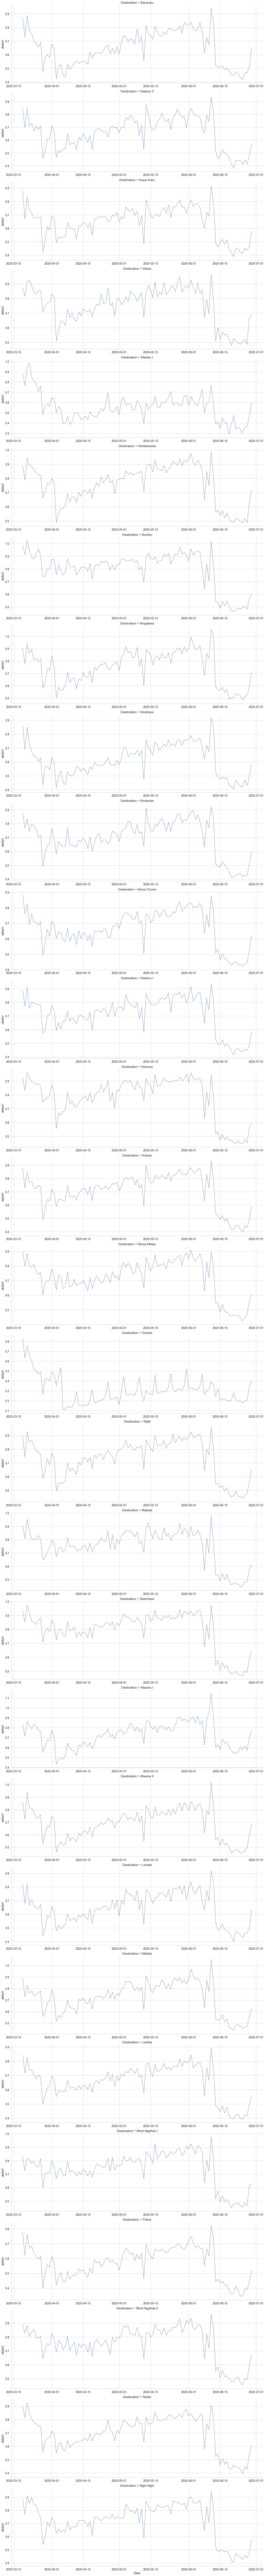

In [44]:
g = sns.FacetGrid(df_trend, row="Destination",aspect=3,height=6,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

# Presence Data

In [46]:
# reading csv file
dfp = pd.read_csv('../../data/export_csv/Presence_24h.csv',sep = ';')
dfp

,Date,Day_type,PresenceType,Type,Activity_Zone,Home_Zone,Zone,Volume
0,2020-01-31,JO,Jour,Local,Hors_Zone,Hors_Zone,Kole,716
1,2020-01-31,JO,Nuit,Local,Hors_Zone,Hors_Zone,Kole,250
2,2020-01-31,JO,Jour,Local,Kole,Hors_Zone,Kole,657
3,2020-01-31,JO,Nuit,Local,Kole,Hors_Zone,Kole,214
4,2020-01-31,JO,Jour,Local,Omendjadi,Hors_Zone,Kole,35
...,...,...,...,...,...,...,...,...
4671283,2020-06-29,JO,Jour,Etranger,Bikoro,Hors_Zone,Bikoro,30
4671284,2020-06-29,JO,Jour,Etranger,Hors_Zone,Bikoro,Bikoro,60
4671285,2020-06-29,JO,Nuit,Etranger,Hors_Zone,Bikoro,Bikoro,90
4671286,2020-06-29,JO,Jour,Etranger,Bikoro,Bikoro,Bikoro,120


In [47]:
#Duplicates check

dfp[dfp.duplicated()]

,Date,Day_type,PresenceType,Type,Activity_Zone,Home_Zone,Zone,Volume


In [48]:
#Convert to Date

dfp['Date'] = pd.to_datetime(dfp['Date'])

In [49]:
#filter by selected zones

dfp_filtered = dfp[dfp['Zone'].isin(list_filtered_zones)]
dfp_filtered

,Date,Day_type,PresenceType,Type,Activity_Zone,Home_Zone,Zone,Volume
5743,2020-01-31,JO,Jour,Local,Hors_Zone,Hors_Zone,Ndjili,114180
5744,2020-01-31,JO,Nuit,Local,Hors_Zone,Hors_Zone,Ndjili,49544
5745,2020-01-31,JO,Jour,Local,Boko-Kivulu,Hors_Zone,Ndjili,25
5746,2020-01-31,JO,Nuit,Local,Kikwit-Sud,Hors_Zone,Ndjili,477
5747,2020-01-31,JO,Jour,Local,Matadi,Hors_Zone,Ndjili,50
...,...,...,...,...,...,...,...,...
4671233,2020-06-29,JO,Nuit,Etranger,Hors_Zone,Limete,Masina II,26
4671234,2020-06-29,JO,Jour,Etranger,Masina II,Nsele,Masina II,60
4671235,2020-06-29,JO,Jour,Etranger,Hors_Zone,Masina II,Masina II,30
4671236,2020-06-29,JO,Nuit,Etranger,Kisenso,Masina II,Masina II,30


In [50]:
df_agg_dzp = dfp_filtered.groupby(["Date","Zone",'PresenceType'],as_index=0).sum()
df_agg_dzp

,Date,Zone,PresenceType,Volume
0,2020-01-31,Barumbu,Jour,316151
1,2020-01-31,Barumbu,Nuit,229477
2,2020-01-31,Binza Meteo,Jour,901099
3,2020-01-31,Binza Meteo,Nuit,669598
4,2020-01-31,Binza Ozone,Jour,558078
...,...,...,...,...
8521,2020-06-29,Nsele,Nuit,562297
8522,2020-06-29,Police,Jour,200786
8523,2020-06-29,Police,Nuit,112124
8524,2020-06-29,Selembao,Jour,506537


In [51]:
dfp_agg_f_day = df_agg_dzp[df_agg_dzp.PresenceType == 'Jour']
dfp_agg_date_zone = dfp_agg_f_day.groupby(by=['Date','Zone'],as_index=0).sum()
dfp_agg_date_zone

,Date,Zone,Volume
0,2020-01-31,Barumbu,316151
1,2020-01-31,Binza Meteo,901099
2,2020-01-31,Binza Ozone,558078
3,2020-01-31,Bumbu,347374
4,2020-01-31,Gombe,863630
...,...,...,...
4258,2020-06-29,Ndjili,637204
4259,2020-06-29,Ngiri-Ngiri,365684
4260,2020-06-29,Nsele,1035609
4261,2020-06-29,Police,200786


### Merging Presence and Movement

In [95]:
df_mvt_pres = df_filtered_both.merge(dfp_agg_date_zone,left_on=['Origin','Date'], right_on=['Zone','Date'])
df_mvt_pres['move_prop'] = df_mvt_pres['Volume_x']/ df_mvt_pres['Volume_y']
df_mvt_pres[(df_mvt_pres.Date == '2020-02-02') & (df_mvt_pres.Origin == 'Gombe')].sum()
# df_mvt_pres[(df_mvt_pres.Origin == 'Gombe') ]

Origin              GombeGombeGombeGombeGombeGombeGombeGombeGombeG...
Destination         BarumbuBinza MeteoBinza OzoneBumbuKalamu IKala...
Observation_Zone    ZoneGlobaleZoneGlobaleZoneGlobaleZoneGlobaleZo...
Date_day                                                          168
Volume_x                                                       137088
Zone                GombeGombeGombeGombeGombeGombeGombeGombeGombeG...
Volume_y                                                      6992860
move_prop                                                    0.548912
dtype: object

In [96]:
df_mvt_epi = df_mvt_pres.merge(df_pats, left_on='Origin', right_on='patNames')
df_mvt_epi = df_mvt_epi.merge(df_pats, left_on='Destination', right_on='patNames')
df_mvt_epi.drop(['patNames_x','patNames_y','Observation_Zone','Date_day','Zone'],axis=1, inplace=True)
#"fr_users","movers"
df_mvt_epi.rename(columns={'Date':'date','Volume_x':'movers','patIDs_x':'fr_pat','patIDs_y':'to_pat','Volume_y':'fr_users'}, inplace=True)
df_mvt_epi

,date,Origin,Destination,movers,fr_users,move_prop,fr_pat,to_pat
0,2020-01-31,Barumbu,Binza Meteo,1503,316151,0.004754,1,2
1,2020-02-01,Barumbu,Binza Meteo,3895,313243,0.012434,1,2
2,2020-02-02,Barumbu,Binza Meteo,2847,285720,0.009964,1,2
3,2020-02-03,Barumbu,Binza Meteo,3473,257693,0.013477,1,2
4,2020-02-04,Barumbu,Binza Meteo,3346,316326,0.010578,1,2
...,...,...,...,...,...,...,...,...
118979,2020-06-25,Selembao,Barumbu,422,456485,0.000924,29,1
118980,2020-06-26,Selembao,Barumbu,327,520680,0.000628,29,1
118981,2020-06-27,Selembao,Barumbu,546,451699,0.001209,29,1
118982,2020-06-28,Selembao,Barumbu,955,581909,0.001641,29,1


### Save OD matrix to csv

In [98]:
df_mvt_epi[['date','Origin','Destination','fr_pat', 'to_pat','movers','fr_users','move_prop']].to_csv('./epidemiological model/BEARmod/DRCexample/data/mobmat.csv')

# BEARmod
Basic Epidemic, Activity, and Response COVID-19 model

This model implements a basic SEIR simulation model, accounting for variable daily movement patterns, recovery rates, and contact rates. Demonstration of this model can be seen in a recent Nature paper [1]

For a placeholder dummy dataset and example simulation run, please see "run_model_small.R", which uses a dummy movement dataset "testmove.csv"

## Overall model
This model is a metapopulation model of COVID-19 transmission, based on an SEIR modeling framework. Within each patch, this model follows a fairly simple SEIR framework. The primary complexities this model is designed to describe are daily movement patterns, and spatially and temporally heterogeneous reductions in movement and contact rates. Specifically, this model is particularly suited for data that generally come from mobile phone companies.

### Baseline patch-level processes
Within each patch, this model first calculates the number of infected people who recovered or were otherwise removed from the infectious population (ie. through self-isolatuion) at an average rate r, where r is equal to the inverse of the average infectious period. This is explicitly incorporated as a Bernoulli trial for each infected person with a probability of recovering 1-exp⁡(-r). 
Then, the model converts exposed people to infectious by similarly incorporating a Bernoulli trial for each exposed individual, where the daily probability of becoming infectious 1-exp⁡(-ε), where ε was the inverse of the average time spent exposed but not infectious. 
Finally, to end the exposure, infection, and recovery step of the model, newly exposed people are calculated for each city based on the number of infectious people in the city I_i, and the average number of daily contacts that lead to transmission that each infectious person has c. This model then simulates the number of newly exposed people through a random draw from a Poisson distribution for each infectious person where the mean number of new infections per person was c, which was then multiplied by the fraction of people in the patch who are susceptible.
The infection processes within each patch therefore approximate the following deterministic, continuous-time model, where c and r varied through time:
dS/dt=S-c SI/N
dE/dt=c SI/N-εE
dI/dt=εE-rI
dR/dt=rI

### Movement between patches
After completing the infection-related processes, the model moves infectious people between cities, using the proportion of people who went from each patch to each other patch measured in the input OD matrix. Infectious people are moved from their current location to each possible destination (including remaining in the same place) using Bernoulli trials for each infectied person, and each possible destination city. 
Through this model, stochasticity in the numbers and places where COVID-19 appears between simulation runs in this model through variance in numbers of people becoming exposed, infectious, and removed/recovered, as well as variance in numbers of people moving from one city to another.

## Input options and formats
Note: These parameter specifications are relevant for v 0.92, denoted at the top of the bearmod_fx.R file.

First, you will create an empty population list HPop, using InitiatePop(). This function takes as inputs:
- pat_locator: A data frame with variables "patNames", "patIDs" (numeric; sequential from 1:number of patches), and "pop" (population per patch)
- initialInf: A vector of initially infected people per patch, length equal to the number of patches
- initialExp: A vector of initially exposed people per patch, length equal to the number of patches

The initial HPop is then fed into the runSim function, which has the following inputs:
- HPop
- pat_info: This is the same as pat_locator
- movement_reduction_df: a data frame with 3 variables, "date", "name", and "relative_movement". "name" corresponds to the patNames ID for the patch, and "relative_movement" indicates the relative proportion of movement for that day--.3 means all movement for that patch in that day (both incoming and outgoing) will be 30% of the baseline value (specified in mobmat later). This is specified on a per-day basis, and does not have to be complete--any missing day/patch pairs will have 100% of the baseline movement patterns
- contact_reduction_df: a data frame with 3 variables, "date", "name", and "relative_contact". Same as movement_reduction_df except this refers to the relative contact rate within a patch for a given day--ie. .5 means half as many contacts per person
- mobmat: A data frame with variables "date", "fr_pat", "to_pat", "move_prop". fr_pat and to_pat refer to the patch IDs of the origin and destination patches (see patIDs from pat_locator), and move_prop is the proportion of people who move from each origin to each destination on the given day in "date". If stayers are not denoted (origin = destination), then the model will designate this as 1 - sum(movement elsewhere) for a given patch. 

--more parameter definitions coming soon--

Contact:
Nick W Ruktanonchai; 
nrukt00 at gmail.com

[1] Lai, S., Ruktanonchai, N.W., Zhou, L. et al. Effect of non-pharmaceutical interventions to contain COVID-19 in China. Nature (2020). https://doi.org/10.1038/s41586-020-2293-x
